In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
breast_cancer = pd.read_csv('breast-cancer.data')

# got column names from .data file:
column_names = ["class", "age", "menopause", "tumor_size", "inv_nodes", "node_caps", "deg-malig", "breast", "breast_quad", "irradiat"]

# add column names to df for analysis:
df_all = pd.read_csv("breast-cancer.data", names = column_names)

# Apply theme to all plots
plt.style.use('Solarize_Light2')

In [179]:
#df_all.head(20)

In [118]:
# check for missing values - none!
df_all.isnull().values.any()

False

In [54]:
df_all.breast_quad.unique()
# some missing data for breast quadrant (tumor location)

# going to look at tumor location, so dropping all observations with unknown breast quadrant:
df = df[df_all['breast_quad']!='?']
df.breast_quad.unique()

C:\Users\25361\AppData\Local\Temp/ipykernel_11688/1753452860.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_all['breast_quad']!='?']


array(['left_low', 'right_up', 'left_up', 'right_low', 'central'],
      dtype=object)

In [148]:
# make age and tumor size categorical, so they're ordered correctly in all figures
df['age']=pd.Categorical(df['age'],['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])
df_all['age']=pd.Categorical(df_all['age'],['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])

df['tumor_size']=pd.Categorical(df['tumor_size'],["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54"])
df_all['tumor_size']=pd.Categorical(df_all['tumor_size'],["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54"])


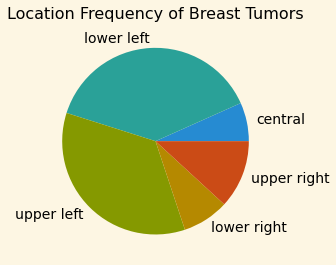

In [100]:
# Pie chart of tumor location (breast quadrant)

df.groupby(['breast_quad']).sum()
y = np.array([39,224,204,47,69])
mylabels = ["central", "lower left", "upper left", "lower right", "upper right"]
plt.pie(y, labels=mylabels)
plt.title('Location Frequency of Breast Tumors', fontsize=16)
plt.show()

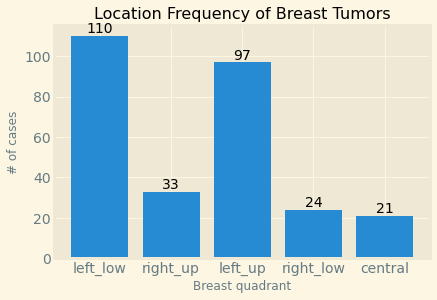

In [75]:
# Histogram of location (breast quadrant) of tumors

#plt.style.use('fivethirtyeight')
count, edges, bars = plt.hist(df["breast_quad"], bins=np.arange(6)-0.5, rwidth=0.8, align='mid')
plt.bar_label(bars)
plt.xlabel('Breast quadrant', fontsize=12)
plt.ylabel('# of cases', fontsize=12)
plt.title('Location Frequency of Breast Tumors', fontsize=16)

plt.show()

# sources: https://matplotlib.org/stable/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py
# https://stackoverflow.com/questions/39841733/matplotlib-histogram-how-to-display-the-count-over-the-barhttps://www.geeksforgeeks.org/add-space-between-histogram-bars-in-matplotlib/
# https://www.geeksforgeeks.org/add-space-between-histogram-bars-in-matplotlib/
# https://stackoverflow.com/questions/27083051/matplotlib-xticks-not-lining-up-with-histogram
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
# https://www.python-graph-gallery.com/199-matplotlib-style-sheets

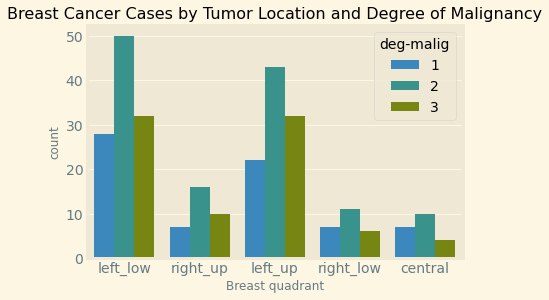

In [143]:
# Histogram/countplot of cases by age, grouped by degree of malignancy
sns.countplot(data=df, x='breast_quad', hue='deg-malig').set(
  title="Breast Cancer Cases by Tumor Location and Degree of Malignancy",
  xlabel='Breast quadrant')

plt.show()

In [90]:
# next, going to look at the data by age. check for unknowns - no missing data for age
df_all.age.unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

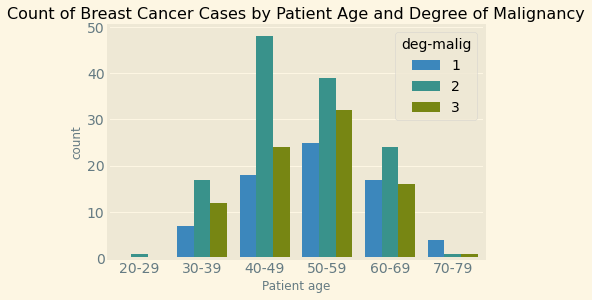

In [149]:
# Histogram/countplot of cases by age, grouped by degree of malignancy
sns.countplot(data=df_all, x='age', hue='deg-malig').set(
  title="Count of Breast Cancer Cases by Patient Age and Degree of Malignancy", xlabel="Patient age")

plt.show()

# https://stackoverflow.com/questions/65691436/how-to-plot-a-stacked-seaborn-histogram-colored-from-a-different-column
# https://stackoverflow.com/questions/44067951/sorting-categorical-labels-in-seaborn-chart
# https://www.statology.org/seaborn-title/

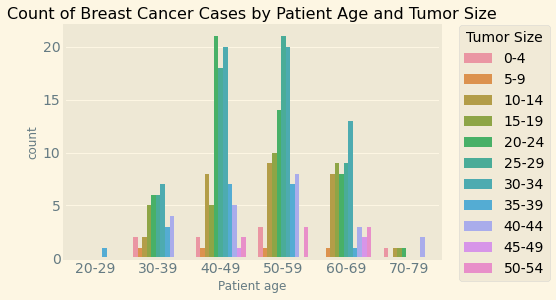

In [176]:
ax = sns.countplot(data=df_all, x='age', hue='tumor_size').set(
  title="Count of Breast Cancer Cases by Patient Age and Tumor Size", xlabel="Patient age")
plt.legend(title="Tumor Size",bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.show()

# https://www.statology.org/seaborn-legend-position/
# https://stackoverflow.com/questions/28468584/seaborn-factorplot-set-series-order-of-display-in-legend

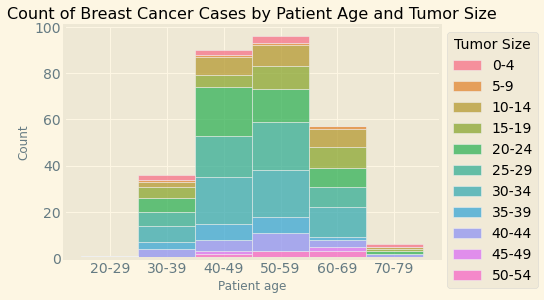

In [180]:
# Same as above histogram, but stacked histogram
ax = sns.histplot(binwidth=0.5, x="age", hue="tumor_size", data=df_all, stat="count", multiple="stack")
ax.set(title="Count of Breast Cancer Cases by Patient Age and Tumor Size", xlabel="Patient age")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title="Tumor Size")

plt.show()

# https://stackoverflow.com/questions/42406233/how-to-add-a-title-to-a-seaborn-boxplot

In [178]:
# sns.swarmplot(data=df, x="age", y="tumor_size", hue='deg-malig', dodge=True, size=3)

#sns.catplot(
#    data=df, kind="swarm",
#    x="breast_quad", y="tumor_size", hue="deg-malig", col="age",
#    aspect=.5)

# couldn't quite get these to work, need "jitter" funtion in R :(